In [82]:
# Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading Dataset

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# checking Null value

print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
# Now we need to fill in the missing values in the Embarked feature

print("Number of people embarking in Southampton (S):")
southampton = train_data[train_data["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (S):")
cherbourg = train_data[train_data["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (S):")
queenstown = train_data[train_data["Embarked"] == "Q"].shape[0]
print(queenstown)

print("Number of embarked null:")
null_data = train_data["Embarked"].isnull().sum()
print(null_data)

print("Embarked 컬럼의 클래스의 데이터 수를 확인")
print(train_data["Embarked"].value_counts())

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (S):
168
Number of people embarking in Queenstown (S):
77
Number of embarked null:
2
Embarked 컬럼의 클래스의 데이터 수를 확인
S    644
C    168
Q     77
Name: Embarked, dtype: int64


# 결측치 처리방법
- 삭제 : 데이터가 많은경우
- 채우기
    - 수치형 데이터 : 평균값, 중간값, 기술통계(확률, 통계)
    - 범주형 데이터 : 빈도수 분석을 기반으로 한 피벗 테이블 이용

## 결측치 채우는 방법
- 채우고 싶은 컬럼과 상관관계가 높은 범주형 데이터를 갖는 컬럼을 찾는다.
- 상관관계가 높은 컬럼들을 이용해서 피벗테이블 생성(절대값이 높을 수록)
- 피벗 테이블에서 결측치가 있는 컬럼의 값을 검색
- apply() 함수를 이용해서 전체 데이터의 Age의 결측치를 채움

In [44]:
# 결측치를 S로 채운다.
train_data["Embarked"]=train_data["Embarked"].fillna("S")

In [32]:
print(train_data["Embarked"].isnull().sum())

0


In [18]:
# 편향이 되어있는지 확인. Fare 부분이 편향이 심한 것을 확인할 수 있음.
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# Fare의 결측치 채우기.
print("train data의 Fare 결측치 수 :")
print(train_data["Fare"].isnull().sum())

print("test data의 Fare 결측치 수 :")
print(test_data["Fare"].isnull().sum())

train data의 Fare 결측치 수 :
0
test data의 Fare 결측치 수 :
1


In [43]:
# Fare의 결측치는 mean으로 채움.
are_mean = test_data["Fare"].mean()
print(fare_mean)
test_data["Fare"] = test_data['Fare'].fillna(fare_mean)
print(test_data.isnull().sum())

35.627188489208635
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [46]:
print("Age 컬럼(train)의 결측치 개수 :")
print(train_data["Age"].isnull().sum())
print("Age 컬럼(test)의 결측치 개수 :")
print(test_data["Age"].isnull().sum())

Age 컬럼(train)의 결측치 개수 :
177
Age 컬럼(test)의 결측치 개수 :
86


In [48]:
# corr -> 상관관계를 구할 수 있다.
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [49]:
test_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008209
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.576619
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.335029
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171488
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230001
Fare,0.008209,-0.576619,0.335029,0.171488,0.230001,1.000000


- values : 결측치를 채우고자 하는 컬럼
- index : 결측치를 채우는데 참고하고자하는 컬럼
- aggfunc : Age 값을 채울 때 사용할 기술 통계 (mean, median 등)

In [50]:
pt1 = train_data.pivot_table(values="Age", index=["Pclass", "Sex"], aggfunc="mean")
print(pt1)

                     Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589


In [52]:
# 결측치를 채울 함수
# 한 사람의 데이터를 받음(row)
def fill_age(row):
    # 넘어온 데이터의 Age 컬럼이 결측치라면
    if np.isnan(row["Age"]):
        # 피벗 테이블에서 Pclass와 Sex 가 일치하는 Age 값을 반환
        return pt1.loc[row["Pclass"], row["Sex"]]
    # 결측치가 아니면 원래값을 반환
    else:
        return row["Age"]

- apply(fill_age, axis=1) : fill_age() 함수를 실행, 행 데이터를 함수로 넘겨줌 
    - 행은 사라지고 열 단위로 집계하고 싶은 경우 axis=0
    - 열은 사라지고 행 단위로 집계하고 싶은 경우 axis=1
- astype("int64") : 피벗테입르 Age값이 실수이므로 정수형으로 변환

In [56]:
train_data["Age"] = train_data.apply(fill_age, axis=1).astype("int64")

In [57]:
test_data["Age"] = test_data.apply(fill_age, axis=1).astype("int64")

In [65]:
print(train_data["Age"].isnull().sum())
print(test_data['Age'].isnull().sum())

0
0


In [64]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [67]:
# cabin은 결측치가 너무 많기 때문에 새로운 클래스인 M으로 채움

train_data['Cabin'] = train_data['Cabin'].fillna('M')
test_data['Cabin'] = test_data['Cabin'].fillna('M')

In [68]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [69]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S


- str.extract('([A-Za-z]+).') 
    -> str에서 대문자 A-Z, 소문자 ,a-z 중 .(온점)으로 끝나는 부분을 추출해내는 것이다. + 가 없으면 처음 알파벳만 추출됨. +가 있어야 단어 전체가 추출된다.

In [70]:
# Name 칼럼을 수정한 새로운 컬럼을 만든다.

train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [72]:
print(train_data["Title"].value_counts())
print(test_data["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [73]:
# Mr, Mrs, Miss, Master로 쓰고, 나머지는 Rare로 통일.

for i in [train_data, test_data]:
    i['Title'] = i['Title'].replace(['Lady', 'Countess','Capt','Dr', 'Col','Don', 'Major', 'Jonkheer', 'Dona','Rev'], 'Rare')
    i['Title'] = i['Title'].replace('Mlle', 'Miss')
    i['Title'] = i['Title'].replace('Ms', 'Miss')
    i['Title'] = i['Title'].replace('Mme', 'Mrs')
    i['Title'] = i['Title'].replace('Sir', 'Mr')
    

In [75]:
print(pd.Categorical(train_data.Title))

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', ..., 'Rare', 'Miss', 'Miss', 'Mr', 'Mr']
Length: 891
Categories (5, object): ['Master', 'Miss', 'Mr', 'Mrs', 'Rare']


In [76]:
# Family 새로운 열을 만들어서 형제,자매 와 부모를 합친다.

train_data['Family'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] 

In [77]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
PassengerId,1.000000,-0.005007,-0.035144,0.040263,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500,0.065997
Age,0.040263,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173,-0.261203
SibSp,-0.057527,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000,0.217138
Family,-0.040143,0.016639,0.065997,-0.261203,0.890712,0.783111,0.217138,1.000000


In [78]:
# Ticket과 Cabin, Name, Age 열을 버린다.
train_data = train_data.drop(['Ticket','Cabin','Name','SibSp','Parch','Age'], axis=1)
test_data = test_data.drop(['Ticket','Cabin','Name','SibSp','Parch','Age'], axis=1)

In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Title,Family
0,1,0,3,male,7.2500,S,Mr,1
1,2,1,1,female,71.2833,C,Mrs,1
2,3,1,3,female,7.9250,S,Miss,0
3,4,1,1,female,53.1000,S,Mrs,1
4,5,0,3,male,8.0500,S,Mr,0


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

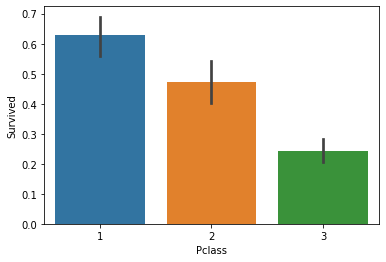

In [84]:
# Survived vs Pclass

sns.barplot(x="Pclass", y="Survived", data=train_data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

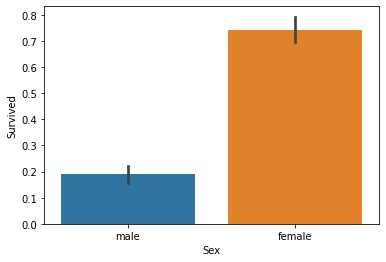

In [85]:
sns.barplot(x="Sex", y="Survived", data=train_data)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


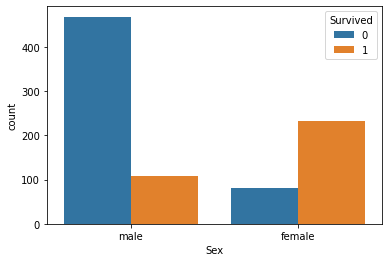

In [88]:
sns.countplot("Sex", hue="Survived", data=train_data)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

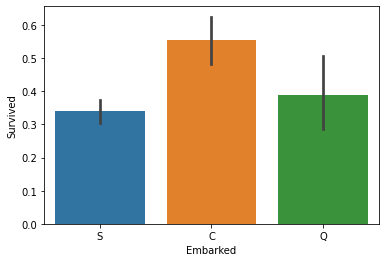

In [89]:
sns.barplot(x="Embarked", y="Survived", data=train_data)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

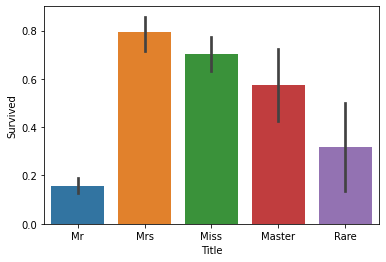

In [90]:
sns.barplot(x="Title", y="Survived", data=train_data)

<AxesSubplot:xlabel='Family', ylabel='Survived'>

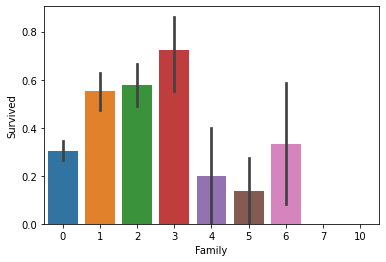

In [91]:
sns.barplot(x="Family", y="Survived", data=train_data)